# EXERCÍCIO:
1. `Crie um classificador não supervisionado para a base adult.csv tendo como base a coluna income;`
1. `Opcionalmente você pode utilizar uma base da sua sprint para avaliar o uso de algoritmos nao-superviosionados, ex: veltec, Bosch, agrisolus, inep, etc;`

In [2]:
#Bibliotecas principais
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
import scipy as sp

from sklearn import linear_model
from sklearn import preprocessing
from matplotlib import pyplot as plt

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

#Outras bibliotecas
from sklearn.datasets import make_classification, fetch_olivetti_faces
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, LeaveOneOut, train_test_split
from sklearn.cluster import KMeans, DBSCAN

C:\Users\cv\.conda\envs\modulo2\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\cv\.conda\envs\modulo2\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Carregando o dataset

In [4]:
df = pd.read_csv('../../exercicio/adult.csv')

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [36]:
le = preprocessing.LabelEncoder()
#df['workclass']       = le.fit_transform(df['workclass'])
#df['education']       = le.fit_transform(df['education'])
#df['marital-status']  = le.fit_transform(df['marital-status'])
#df['occupation']      = le.fit_transform(df['occupation'])
#df['relationship']    = le.fit_transform(df['relationship'])
#df['race']            = le.fit_transform(df['race'])
#df['gender']          = le.fit_transform(df['gender'])
#df['native-country']  = le.fit_transform(df['native-country'])
#df['race']            = le.fit_transform(df['race'])
#df['income']          = le.fit_transform(df['income'])

display(df.head())
df.describe()

#Outra opção mais enxuta:
for label in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'gender', 'native-country', 'income', 'race']:
    df[label] = le.fit_transform(df[label]) 

print(df.corr())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,index
0,0.109589,0.50,0.145129,0.066667,0.400000,0.666667,0.500000,0.6,0.5,1.0,0.000000,0.0,0.397959,0.95122,0.0,0.000000
1,0.287671,0.50,0.052451,0.733333,0.533333,0.333333,0.357143,0.0,1.0,1.0,0.000000,0.0,0.500000,0.95122,0.0,0.000020
2,0.150685,0.25,0.219649,0.466667,0.733333,0.333333,0.785714,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95122,1.0,0.000041
3,0.369863,0.50,0.100153,1.000000,0.600000,0.333333,0.500000,0.0,0.5,1.0,0.076881,0.0,0.397959,0.95122,1.0,0.000061
4,0.013699,0.00,0.061708,1.000000,0.600000,0.666667,0.000000,0.6,1.0,0.0,0.000000,0.0,0.295918,0.95122,0.0,0.000082


                      age  workclass    fnlwgt  education  educational-num  \
age              1.000000   0.017526 -0.076628  -0.015058         0.030940   
workclass        0.017526   1.000000 -0.016546   0.017187         0.055918   
fnlwgt          -0.076628  -0.016546  1.000000  -0.022570        -0.038761   
education       -0.015058   0.017187 -0.022570   1.000000         0.359668   
educational-num  0.030940   0.055918 -0.038761   0.359668         1.000000   
marital-status  -0.263978  -0.068441  0.029851  -0.037417        -0.069992   
occupation      -0.014259   0.260005  0.000860  -0.020972         0.112265   
relationship    -0.263383  -0.092365  0.009092  -0.010758        -0.090534   
race             0.028421   0.052932 -0.027062   0.013250         0.029239   
gender           0.088120   0.091223  0.027739  -0.027041         0.009328   
capital-gain     0.077229   0.036044 -0.003706   0.028928         0.125146   
capital-loss     0.056944   0.010880 -0.004366   0.017638       

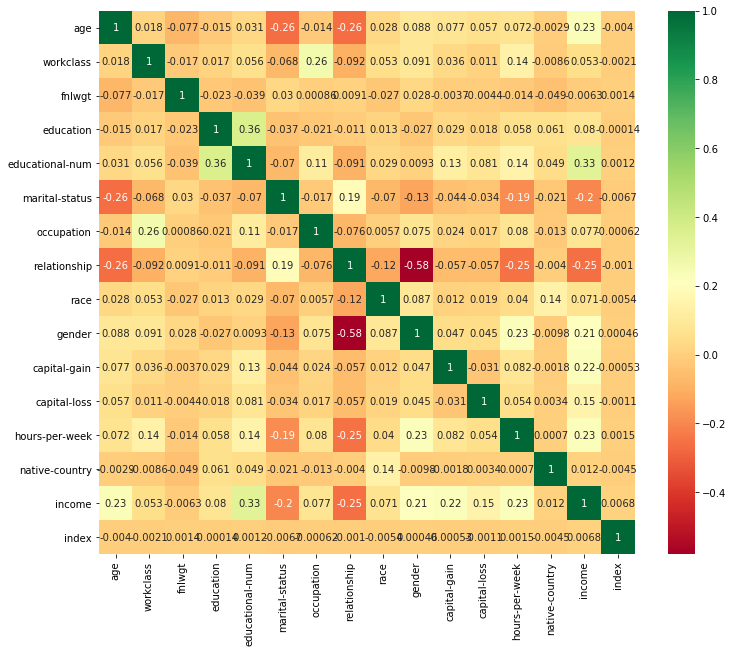

In [37]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

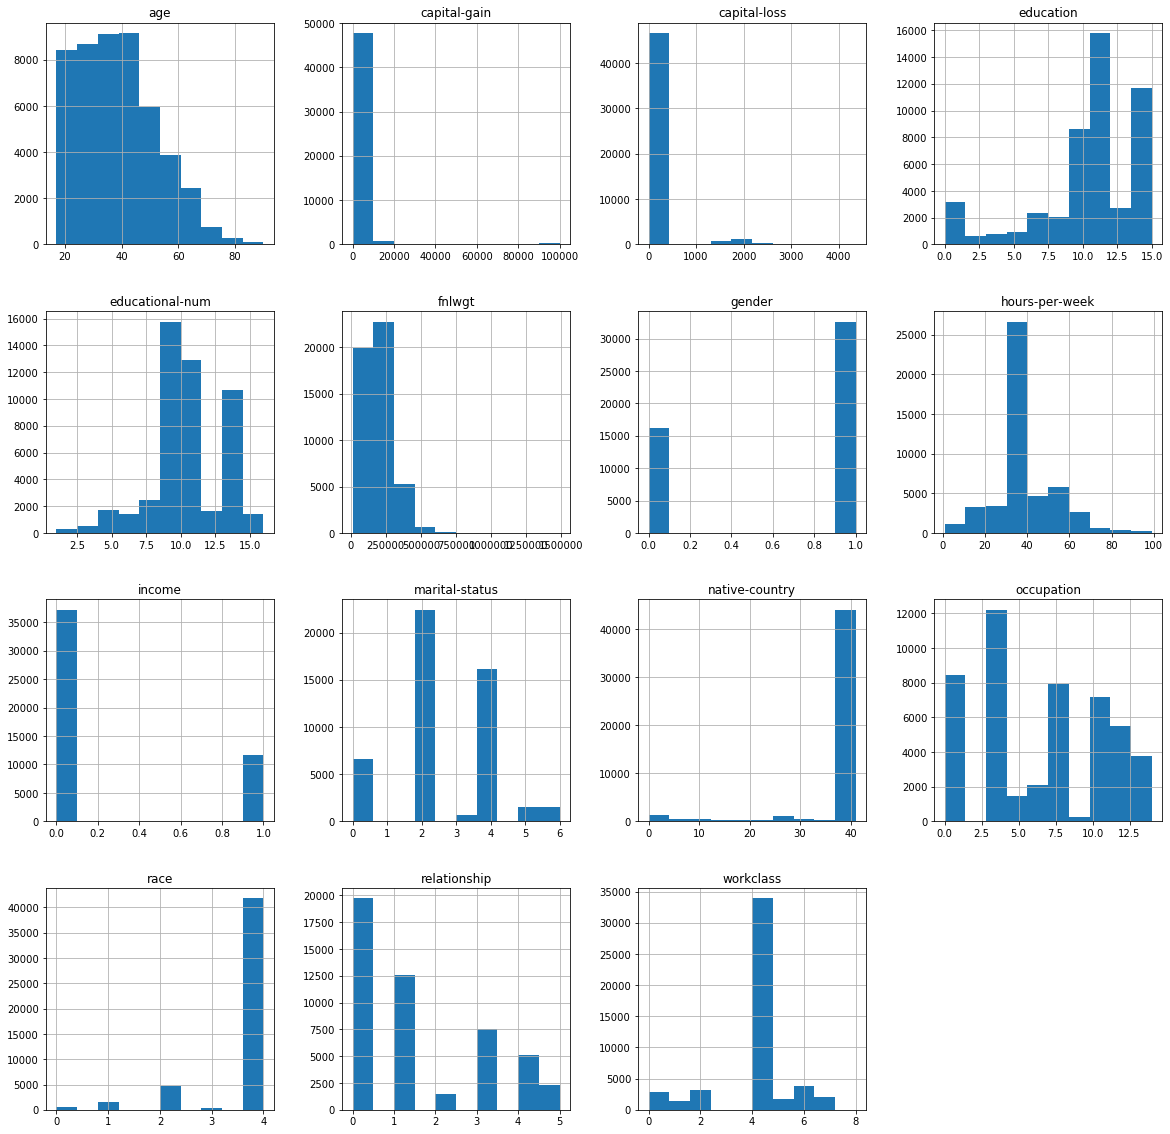

In [7]:
p = df.hist(figsize = (20,20))

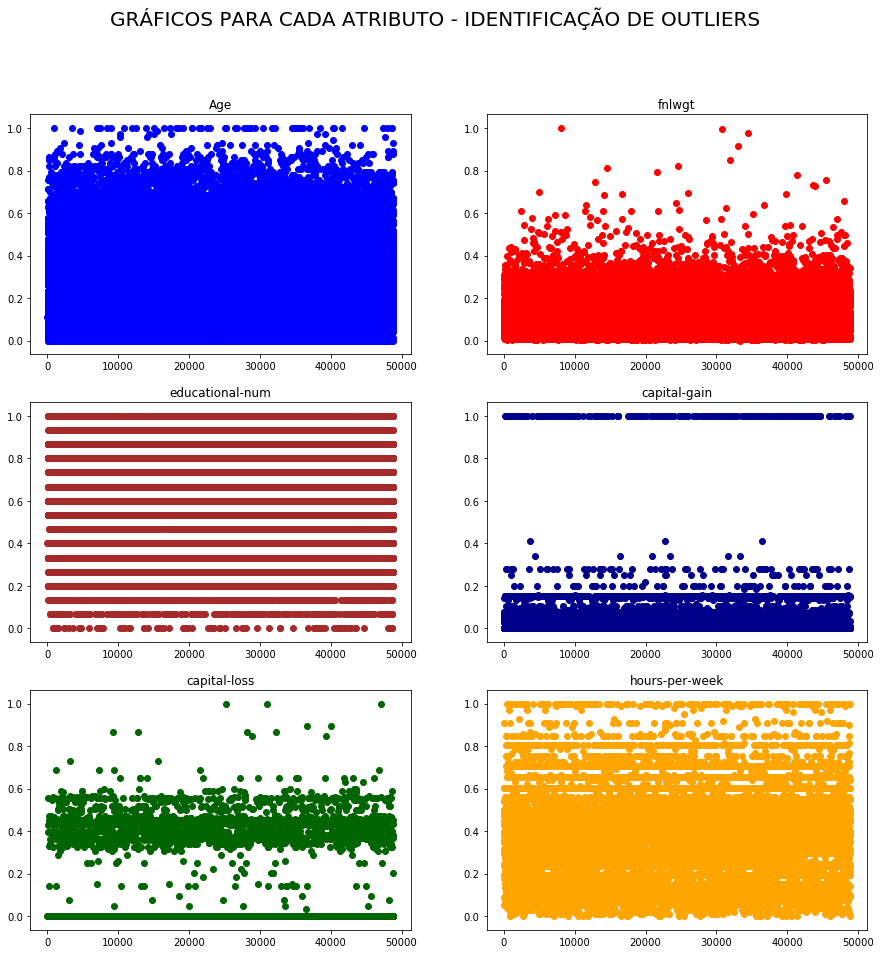

In [38]:
dfg          = df
dfg['index'] = dfg.index

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.suptitle("GRÁFICOS PARA CADA ATRIBUTO - IDENTIFICAÇÃO DE OUTLIERS", fontsize=20)

ax[0, 0].scatter(dfg['index'], dfg["age"],             color = "blue")
ax[0, 0].set_title("Age")
ax[0, 1].scatter(dfg['index'], dfg["fnlwgt"],          color = "red")
ax[0, 1].set_title("fnlwgt")
ax[1, 0].scatter(dfg['index'], dfg["educational-num"], color = "brown")
ax[1, 0].set_title("educational-num")
ax[1, 1].scatter(dfg['index'], dfg["capital-gain"],    color = "darkblue")
ax[1, 1].set_title("capital-gain")
ax[2, 0].scatter(dfg['index'], dfg["capital-loss"],    color = "darkgreen")
ax[2, 0].set_title("capital-loss")
ax[2, 1].scatter(dfg['index'], dfg["hours-per-week"], color = "orange")
ax[2, 1].set_title("hours-per-week")

plt.show()

## Analisar percentual de dados faltantes

In [9]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentual = round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percentual], axis=1, keys=['Total','Percentual'])

In [10]:
missing_data(df)

,Total,Percentual
income,0,0.0
native-country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0
capital-gain,0,0.0
gender,0,0.0
race,0,0.0
relationship,0,0.0
occupation,0,0.0
marital-status,0,0.0


## Analisar percentual de valores iguais a zero

In [10]:
def zero_entries(df):
    total = df.isin([0]).sum().sort_values(ascending = False)
    percentual = round(df.isin([0]).sum().sort_values(ascending = False) / len(df) * 100, 2)
    return pd.concat([total, percentual], axis=1, keys=['Total','Percentual'])

In [11]:
zero_entries(df)

,Total,Percentual
capital-loss,46560,95.33
capital-gain,44807,91.74
income,37155,76.07
relationship,19716,40.37
gender,16192,33.15
marital-status,6633,13.58
occupation,2809,5.75
workclass,2799,5.73
education,1389,2.84
native-country,857,1.75


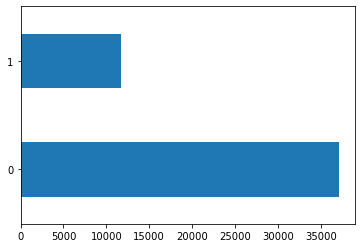

In [12]:
df.income.value_counts().plot.barh();

In [39]:
X = df.drop(columns=['income'])
y = df['income']
X.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,index
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,3.870439,0.120004,10.288420,0.605206,2.618750,6.577700,1.443287,3.668052,0.668482,0.010791,0.020088,0.402269,36.749355,24420.500000
std,0.187815,1.464234,0.071445,3.874492,0.171398,1.507703,4.230509,1.602151,0.845986,0.470764,0.074521,0.092517,0.126443,7.775343,14099.615261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,4.000000,0.071216,9.000000,0.533333,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.397959,39.000000,12210.250000
50%,0.273973,4.000000,0.112210,11.000000,0.600000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.397959,39.000000,24420.500000
75%,0.424658,4.000000,0.152462,12.000000,0.733333,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.448980,39.000000,36630.750000
max,1.000000,8.000000,1.000000,15.000000,1.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,41.000000,48841.000000


## Normalização dos dados:

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df

for label in list(df_scaled):
    df_scaled[label] = scaler.fit_transform(df_scaled[label].to_numpy().reshape(-1, 1))

X = df_scaled.drop(['income'], axis=1)
y = df_scaled['income']
print(X.shape)
print(y.shape)
y.describe()
y

(48842, 15)
(48842,)


0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
48837    0.0
48838    1.0
48839    0.0
48840    0.0
48841    1.0
Name: income, Length: 48842, dtype: float64

## Utilizando KMeans

In [41]:
kmeans = KMeans(n_clusters=2, algorithm='auto', init='k-means++', n_init=100)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [42]:
grid_params = [{'n_clusters': [2],"init": ['k-means++', 'random'], "n_init": [10,100,1000], "algorithm": ['auto', 'full', 'elkan']}]

gs = GridSearchCV(estimator=KMeans(), param_grid=grid_params, scoring='accuracy', n_jobs=-1)
gs.fit(X, y)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

Best accuracy: 0.504

Best params:
 {'algorithm': 'full', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 100}


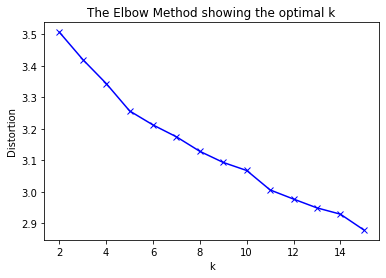

In [91]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []

K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'mahalanobis'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

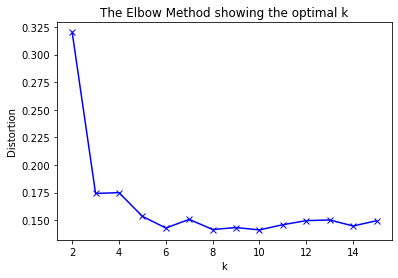

In [92]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# k means determine k
silhouette = []
K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    silhouette.append(silhouette_score(X, kmeanModel.labels_))
    
# Plot the elbow
#plt.plot(K, distortions, 'bx-')
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [43]:
print(classification_report(y, y_kmeans))

              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65     37155
         1.0       0.11      0.15      0.13     11687

    accuracy                           0.50     48842
   macro avg       0.40      0.38      0.39     48842
weighted avg       0.56      0.50      0.53     48842



### Método para descobrir melhor valor para eps:

#### Uma abordagem para selecionar um número eps é a seguinte:
* utilizar NN (versão supervisionada) passando n igual ao número de features
    * O NearestNeighbors implementa a aprendizagem de vizinhos mais próximos não supervisionados.
* Plotamos os valores de distancia encontrados
* o valor de eps adequado aparece quando não há mais variação considerável do valor (similar a método elbow)

fonte: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

In [44]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

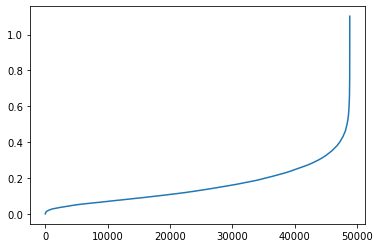

In [45]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Utilizando modelo DBScan

In [85]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
y_pred = dbscan.fit_predict(X, y)

In [88]:
print(dbscan.labels_)

[0 1 1 ... 2 1 2]


In [89]:
dbscan.labels_.shape
#y['cluster']=dbscan.labels_
#print(y)

(48842,)

In [90]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.92      0.10      0.18     37155
         1.0       0.34      0.78      0.47     11687
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00    

C:\Users\cv\.conda\envs\modulo2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Proximos passos: Comparar os resultados de agrupamento com os resultados da coluna "income"

In [94]:
df['clusters']=clusters
print(df.describe())
print(df.columns)

                age     workclass        fnlwgt     education  \
count  48842.000000  48842.000000  48842.000000  48842.000000   
mean       0.296487      0.483805      0.120004      0.685895   
std        0.187815      0.183029      0.071445      0.258299   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.150685      0.500000      0.071216      0.600000   
50%        0.273973      0.500000      0.112210      0.733333   
75%        0.424658      0.500000      0.152462      0.800000   
max        1.000000      1.000000      1.000000      1.000000   

       educational-num  marital-status    occupation  relationship  \
count     48842.000000    48842.000000  48842.000000  48842.000000   
mean          0.605206        0.436458      0.469836      0.288657   
std           0.171398        0.251284      0.302179      0.320430   
min           0.000000        0.000000      0.000000      0.000000   
25%           0.533333        0.333333      0.214286      0.0000

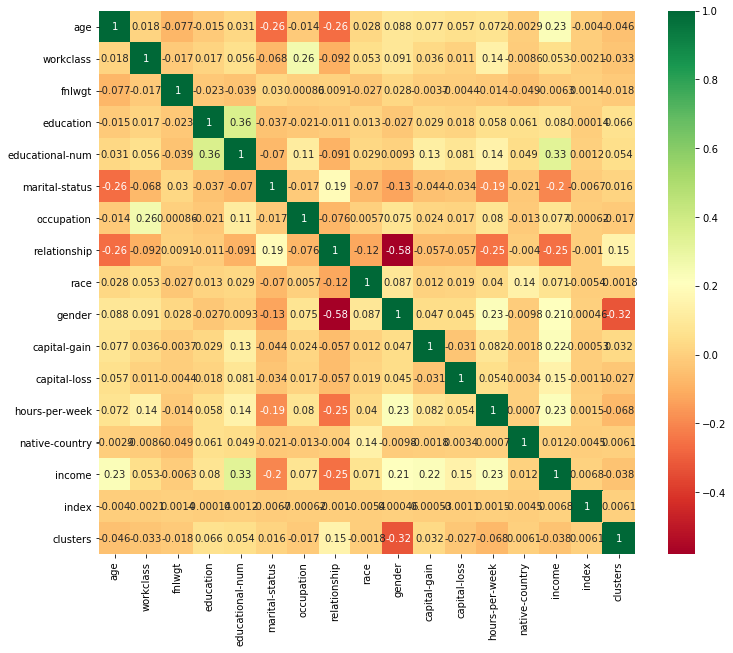

In [95]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [97]:
c0 = df.loc[df['clusters']==0]
print(c0['income'].unique())
print(c0['education'].mean())
c1 = df.loc[df['clusters']==1]
print(c1['income'].unique())
print(c1['education'].mean())
c2 = df.loc[df['clusters']==2]
print(c2['income'].unique())
print(c2['education'].mean())

[0. 1.]
0.16587019149296728
[0. 1.]
0.759524685453609
[0. 1.]
0.7730861603122184


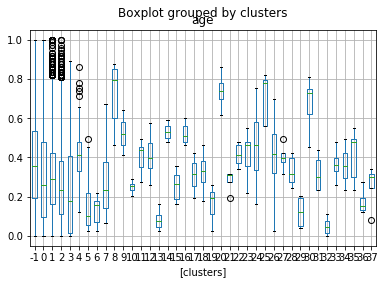

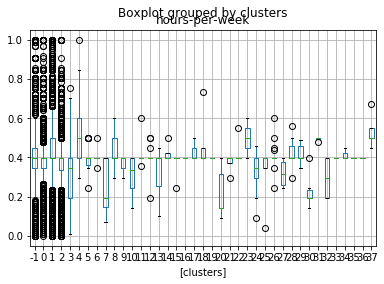

In [96]:
df.boxplot(column=['age'], by=['clusters'])
df.boxplot(column=['hours-per-week'], by=['clusters'])

In [ ]:
#Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
#       'marital-status', 'occupation', 'relationship', 'race', 'gender',
#       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
#       'income', 'index', 'clusters'],
#      dtype='object')